## Songs recognition

#### Let's import our libraries for futher work

In [1]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import Image, display 
import ipyplot

from sklearn.metrics import accuracy_score

import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as subplots


import warnings
warnings.filterwarnings("ignore")

#### load and pre-processing our data 

In [3]:
df = pd.read_csv("data/data.csv")
df_by_genre = pd.read_csv('data/data_by_genres.csv')
df_by_year = pd.read_csv('data/data_by_year.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [5]:
df.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [6]:
df = df.drop_duplicates(subset=['name', 'artists'], keep="last")

In [7]:
df = df.dropna()
df = df.reset_index(drop=True)

In [8]:
df.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

### Loading music from Spotify

In [9]:
songs_id = df.sort_values(by = ["popularity"], ascending = False)['id'].values[50:500]

In [10]:
import spotipy
from __future__ import unicode_literals
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials
from youtubesearchpython import VideosSearch
import youtube_dl

url = "spotify:track:"
client_id = 'a4cd9a0b8ad2434fb6b38dfa7fb2bf27'
secret = '4b23b56bbd514c178d0f8341f0b1c61e'

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

In [11]:
def music(result):
  performers = ""
  music = result['name']
  for names in result["artists"]:
    performers = performers + names["name"] + ", "
  performers = performers.rstrip(", ")
  video = search(music, performers)
  name = f"{performers} - {music}"
  print(name)
  ydl_opts = {'format': 'bestaudio/best', 'postprocessors': [{'key': 'FFmpegExtractAudio', 'preferredcodec': 'mp3', 'preferredquality': '192',}], 'outtmpl': f'./{name}.webm'}
    
  download(video, ydl_opts)
  print("Готово!")

In [12]:
def search(music, performers):
  videosSearch = VideosSearch(f'{performers} - {music}', limit = 1)
  videoresult = videosSearch.result()["result"][0]["link"]
  return videoresult


In [13]:
def download(videoresult, ydl_opts):
  with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    try:
        ydl.download([videoresult])
    except:
      print("Can't download")

In [ ]:
for id in songs_id:
    result = spotify.track(f'{url}{id}')
    music(result)

#### Convert music from .mp3 to .wav format and make dataframe from paths and name of songs

In [558]:
# from pydub import AudioSegment
import subprocess
# sound = AudioSegment.from_mp3("/path/to/file.mp3")
# sound.export("/output/path/file.wav", format="wav")

In [559]:
def convert(dir):
    for i in os.listdir(dir):
        audio = (dir + "/" + str(i))
        subprocess.call(['ffmpeg', '-i', f'{audio}',
                   f'{audio}.wav'])

In [ ]:
convert('songs')

In [12]:
def create_dataframe(dir):
    target = []
    audio = []
    for i in os.listdir(dir):
        target.append(str(i)[:-4])
        audio.append(dir + "/" + str(i))
        df_songs = pd.DataFrame(columns=["audio", "target"])
        df_songs["path"] = audio
        df_songs["name_of_song"] = target
    return df_songs

In [533]:
df_songs = create_dataframe('songs/songs_wav')
df_songs = df_songs[['path','name_of_song']]

In [534]:
df_songs.head()

,path,name_of_song
0,songs/songs_wav/Ariana Grande - 7 rings.wav,Ariana Grande - 7 rings
1,"songs/songs_wav/Ariana Grande, Doja Cat - moti...","Ariana Grande, Doja Cat - motive (with Doja Cat)"
2,songs/songs_wav/Arizona Zervas - ROXANNE.wav,Arizona Zervas - ROXANNE
3,songs/songs_wav/Ava Max - Kings & Queens.wav,Ava Max - Kings & Queens
4,"songs/songs_wav/Bad Bunny, Jhayco - DÁKITI.wav","Bad Bunny, Jhayco - DÁKITI"


In [16]:
# Import all necessary

import pandas as pd
import numpy as np
import librosa
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble, tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import tensorflow
import librosa.display
from tensorflow.keras import Input
import os
from PIL import Image
from pathlib import Path
import csv


from sklearn.metrics import accuracy_score

import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as subplots


import wandb
from wandb.sklearn import plot_precision_recall, plot_feature_importances, plot_summary_metrics
from wandb.sklearn import plot_class_proportions, plot_learning_curve, plot_roc

import warnings
warnings.filterwarnings("ignore")

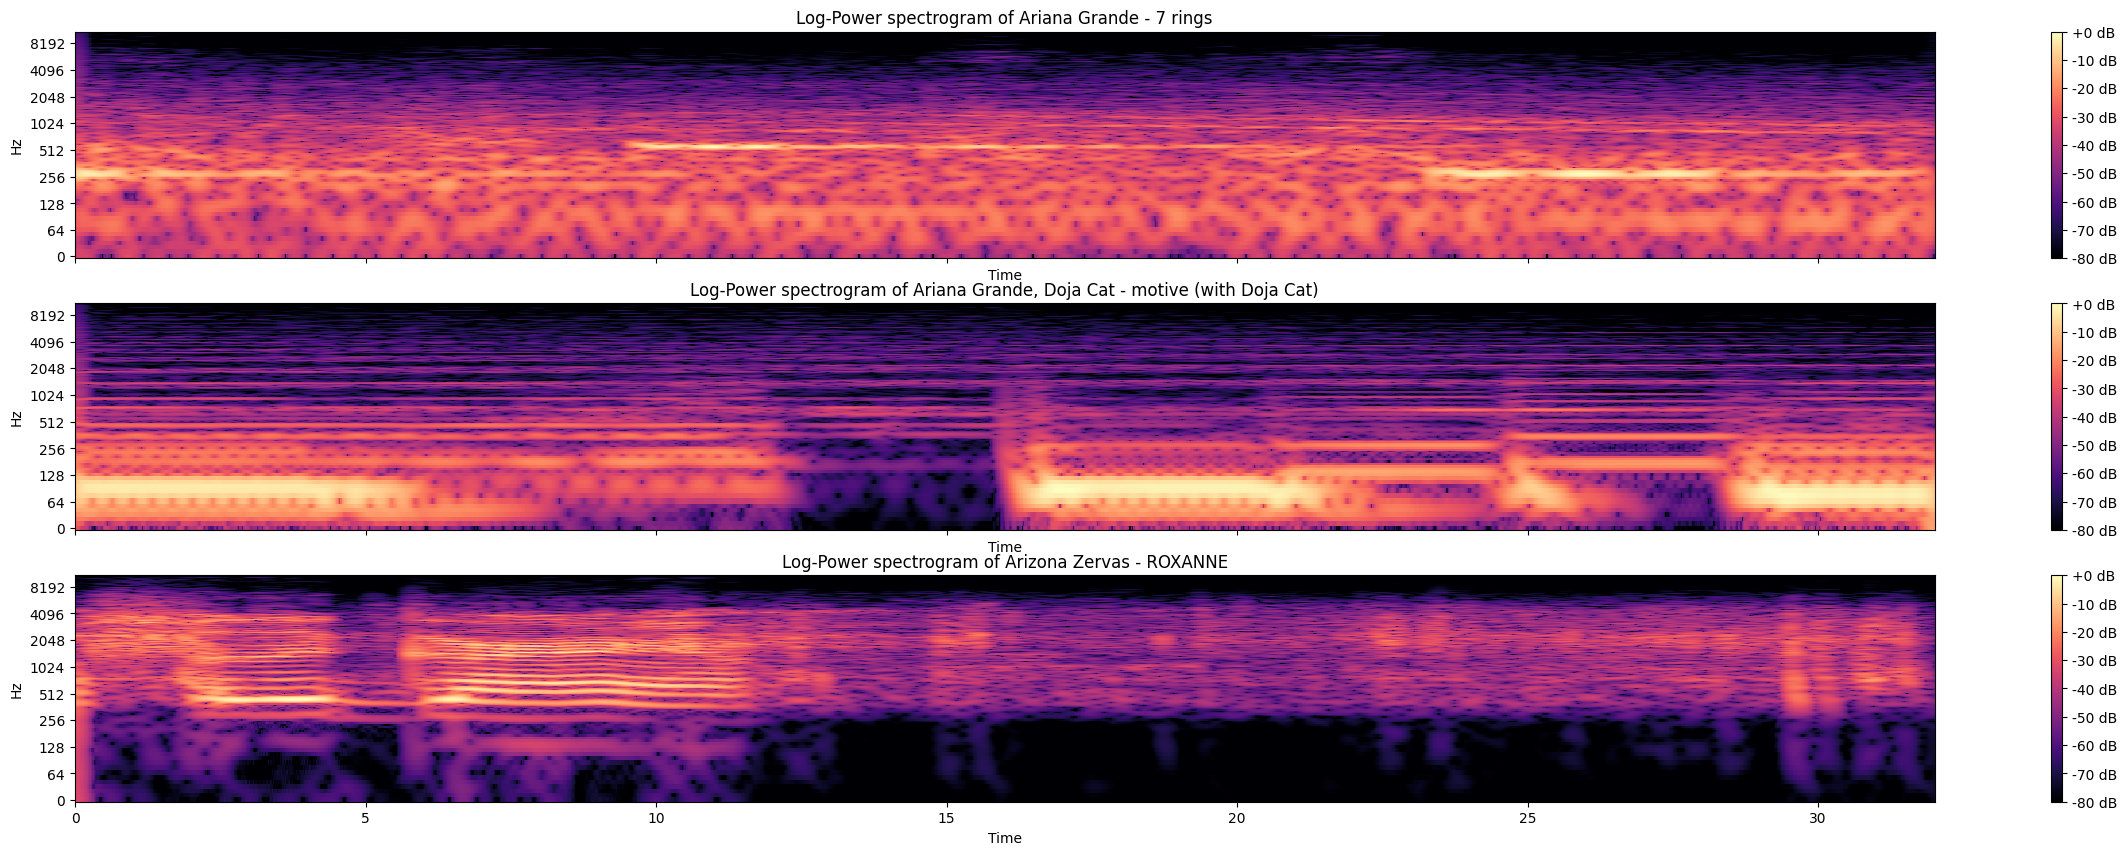

In [578]:
dataset = []

fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(30, 10))
counter = 0
for songname, name_of_song in df_songs.values[:3]:
    # С помощью библиотеки librosa загружаем наши песни в цикле и по ним строим кратковременное преобразование Фурье (STFT)
    y, sr = librosa.load(songname, mono=True, duration= 2, offset=1)
    S = np.abs(librosa.stft(y=y, win_length=1024, hop_length = 32))
    # Переводим STFT в dB из power, таким образом определяя, какие частоты наиболее выделялись в определенный промежуток времени
    imgdb = librosa.display.specshow(librosa.power_to_db(S**2, ref=np.max),
                                  sr=sr, fmax=8192, y_axis='log', x_axis='time', ax=ax[counter])
    ax[counter].set(title=f'Log-Power spectrogram of {name_of_song}')
    fig.colorbar(imgdb, ax=ax[counter], format="%+2.0f dB")
    counter+=1

In [579]:
import librosa
import numpy as np
import scipy.ndimage

def compute_spectrogram(fn_wav, Fs=22050, N=2048, H=1024, bin_max=128, frame_max=None, duration = None, offset = 1):
    x, Fs = librosa.load(fn_wav, sr=Fs, offset = offset, duration = duration)
    x_duration = len(x) / Fs
    X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window='hamming')
    if bin_max is None:
        bin_max = X.shape[0]
    if frame_max is None:
        frame_max = X.shape[0]
    Y = np.abs(X[:bin_max, :frame_max])
    return Y

def compute_constellation_map(Y, dist_freq=3, dist_time=3, thresh=0.01):
    """Compute constellation map (implementation using image processing)    
    Args:
        Y (np.ndarray): Spectrogram (magnitude)
        dist_freq (int): Neighborhood parameter for frequency direction (kappa) (Default value = 7)
        dist_time (int): Neighborhood parameter for time direction (tau) (Default value = 7)
        thresh (float): Threshold parameter for minimal peak magnitude (Default value = 0.01)

    Returns:
        Cmap (np.ndarray): Boolean mask for peak structure (same size as Y)
    """
    result = scipy.ndimage.maximum_filter(Y, size=[2*dist_freq+1, 2*dist_time+1], mode='constant')
    Cmap = np.logical_and(Y == result, result > thresh)
    return Cmap

path = 'songs/songs_wav/Arizona Zervas - ROXANNE.wav'
spec = compute_spectrogram(path)
Cmap = compute_constellation_map(spec, dist_freq=7, dist_time=3)
print(Cmap.shape)

(128, 1025)


In [580]:
import matplotlib.pyplot as plt

def plot_constellation_map(Cmap, Y=None, xlim=None, ylim=None, title='',
                           xlabel='Time (sample)', ylabel='Frequency (bins)',
                           s=5, color='r', marker='o', figsize=(7, 3), dpi=72):
    
    """Plot constellation map
    Args:
        Cmap: Constellation map given as boolean mask for peak structure
        Y: Spectrogram representation (Default value = None)
        xlim: Limits for x-axis (Default value = None)
        ylim: Limits for y-axis (Default value = None)
        title: Title for plot (Default value = '')
        xlabel: Label for x-axis (Default value = 'Time (sample)')
        ylabel: Label for y-axis (Default value = 'Frequency (bins)')
        s: Size of dots in scatter plot (Default value = 5)
        color: Color used for scatter plot (Default value = 'r')
        marker: Marker for peaks (Default value = 'o')
        figsize: Width, height in inches (Default value = (7, 3))
        dpi: Dots per inch (Default value = 72)

    Returns:
        fig: The created matplotlib figure
        ax: The used axes.
        im: The image plot
        k:  The frequency's coordinate of peak
        n:  The time's coordinate of peak
    """
    if Cmap.ndim > 1:
        (K, N) = Cmap.shape
    else:
        K = Cmap.shape[0]
        N = 1
    if Y is None:
        Y = np.zeros((K, N))
    fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
    im = ax.imshow(Y, origin='lower', aspect='auto', cmap='gray_r', interpolation='nearest')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    Fs = 1
    if xlim is None:
        xlim = [-0.5/Fs, (N-0.5)/Fs]
    if ylim is None:
        ylim = [-0.5/Fs, (K-0.5)/Fs]
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    n, k = np.argwhere(Cmap == 1).T
    ax.scatter(k, n, color=color, s=s, marker=marker)
    plt.tight_layout()
    return fig, ax, im, k, n
    return k, n

# fig, ax, im, k, n = plot_constellation_map(Cmap, np.log(1 + 1 * spec), color='r', s=20, figsize=(15, 5))
# fig.savefig('constellation-map.png')

### Draw spectograms with peaks

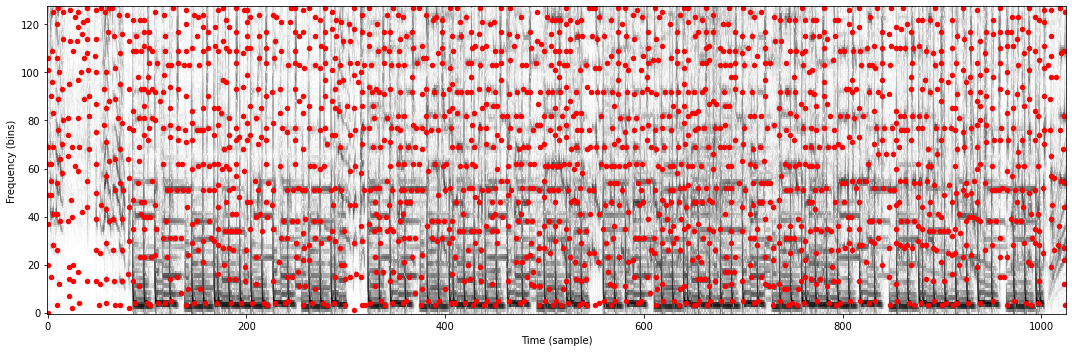

In [318]:
path = 'songs/songs_wav/Arizona Zervas - ROXANNE.wav'
spec = compute_spectrogram(path)
Cmap = compute_constellation_map(spec, dist_freq=4, dist_time=2)
fig, ax, im, k, n = plot_constellation_map(Cmap, np.log(1 + 1 * spec), color='r', s=20, figsize=(15, 5))
fig.savefig('constellation-map.png')

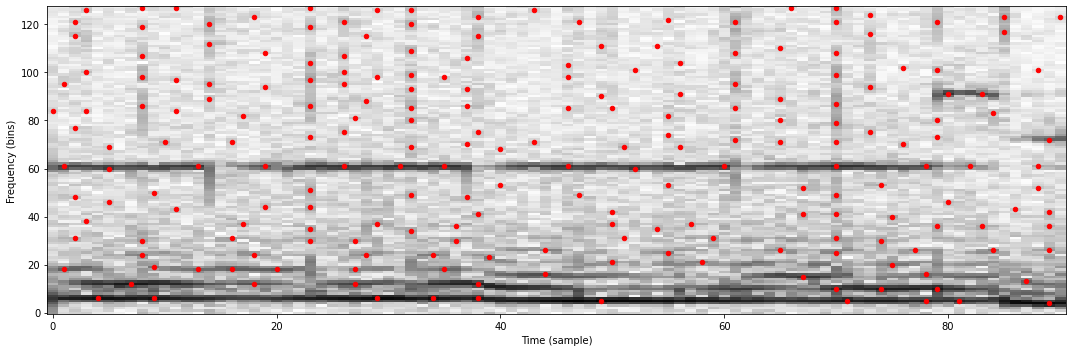

In [319]:
path = 'random6.wav'
spec = compute_spectrogram(path)
Cmap1 = compute_constellation_map(spec, dist_freq=4, dist_time=2)
fig, ax, im, k1, n1 = plot_constellation_map(Cmap1, np.log(1 + 1 * spec), color='r', s=20, figsize=(15, 5))
# fig.savefig('constellation-map.png')

### Let's make some functions

In [256]:
def compare (val, val2):
    count = 0
    for el in val:
        if el in val2:
            count += 1
    return count

In [584]:
def constellation_map(Cmap, Y=None, xlim=None, ylim=None):

    """Plot constellation map
    Args:
        Cmap: Constellation map given as boolean mask for peak structure
        Y: Spectrogram representation (Default value = None)

    Returns:
        k:  The frequency's coordinate of peak
        n:  The time's coordinate of peak
    """
    if Cmap.ndim > 1:
        (K, N) = Cmap.shape
    else:
        K = Cmap.shape[0]
        N = 1
    if Y is None:
        Y = np.zeros((K, N))
    Fs = 1
    n, k = np.argwhere(Cmap == 1).T
    return k, n


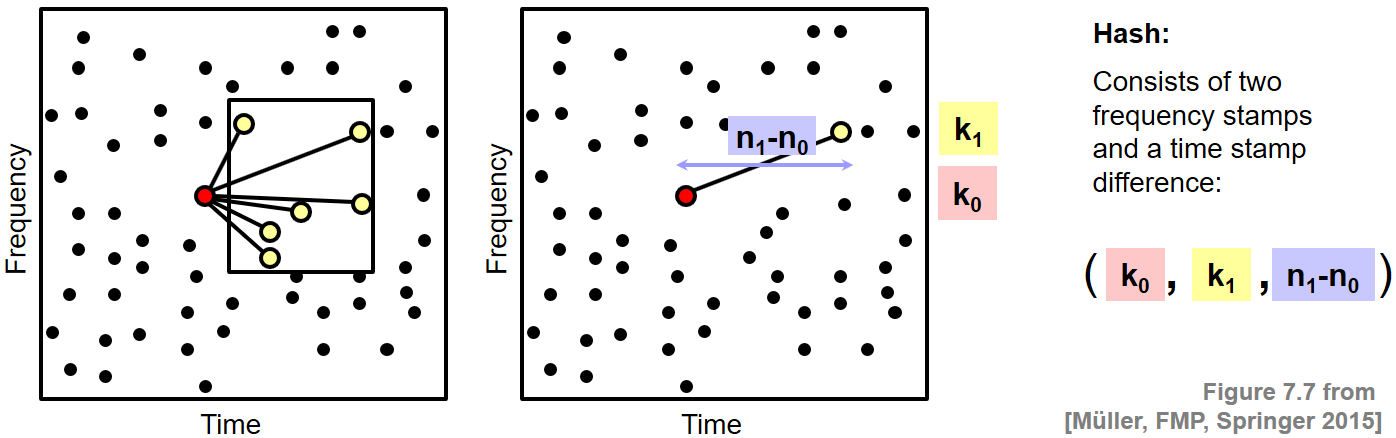

In [600]:
import IPython
url = 'https://www.audiolabs-erlangen.de/resources/MIR/FMP/data/C7/FMP_C7_F07.png'
IPython.display.Image(url, width = 600)

In [587]:
def recognize(path = 'random.wav', durations = [2, 3, 5], dist_freq=2, dist_time=2, stopping = 70, offset = 0):

    """Recognition of song 
    Args:
        path (str): path to music in .wav format (Default value = 'random.wav')
        durations (list): dupation of song which we load for spectogramm and peaks computation (Default value = 'random.wav')
        dist_freq (int): Neighborhood parameter for frequency direction (kappa) (Default value = 2)
        dist_time (int): Neighborhood parameter for time direction (tau) (Default value = 2)
        stopping (int): value of coinciding hashes which enough to recognize name of song (Default value = 70)
        offset (int): place of song from which we start load (Default = 0)

    Returns:
        max (int):  max matches of hash 
        name (str):  name of recognized song
        duration*iter (int): place of song from which we get similar part of song
    """
    for duration in durations:
        y, sr = librosa.load(path)
        offset_for_rec = librosa.get_duration(y=y, sr=sr) % (librosa.get_duration(y=y, sr=sr) // 1)
        spec = compute_spectrogram(path, duration = duration, offset = offset_for_rec)
        Cmap = compute_constellation_map(spec, dist_freq= dist_freq, dist_time= dist_time)
        k_test, n_test = constellation_map(Cmap, np.log(1 + 1 * spec))
        test = hash(k_test,n_test)
        max = -1
        name = ''
        for path in df_songs['path'].values:
             y, sr = librosa.load(path)
             iterator = int(librosa.get_duration(y=y, sr=sr)//duration)
             for iter in range(iterator):
                 spec = compute_spectrogram(path, duration = duration, offset = duration*iter)
                 Cmap = compute_constellation_map(spec, dist_freq= dist_freq, dist_time= dist_time)
                 k, n = constellation_map(Cmap, np.log(1 + 1 * spec))
                 tmp = hash(k,n)
                 if max < compare(test, tmp):
                     name = path
                     max = compare(test, tmp)
                     print(max, name, duration*iter)
                     if max > stopping:
                         print(f'Duration of part was {duration} seconds \n', f'Most similar part was in {name}, \n' f' Period: {(duration*iter) // 60} minutes {duration*iter - 60*((duration*iter) // 60)} seconds - ' f'{(duration*iter) // 60} minutes {duration*iter - 60*((duration*iter) // 60) + duration} seconds')
                         return max, name, duration*iter
    if max < stopping:
        print('Probably answer will be not correct. Try with another song part')
        return max, name, duration*iter
             

In [588]:
max, name, offset = recognize('random.wav')

6 songs/songs_wav/Ariana Grande - 7 rings.wav 0
17 songs/songs_wav/Ariana Grande - 7 rings.wav 4
25 songs/songs_wav/Ariana Grande - 7 rings.wav 62
29 songs/songs_wav/Ariana Grande, Doja Cat - motive (with Doja Cat).wav 10
169 songs/songs_wav/Ariana Grande, Doja Cat - motive (with Doja Cat).wav 50
Duration of part was 2 seconds 
 Most similar part was in songs/songs_wav/Ariana Grande, Doja Cat - motive (with Doja Cat).wav, 
 Period: 0 minutes 50 seconds - 0 minutes 52 seconds


In [552]:
from IPython.display import Audio

In [556]:
y, sr = librosa.load(f'{name}', duration = 2, offset = offset)
Audio(data=y, rate=sr)

In [555]:
y, sr = librosa.load('random.wav', duration = 2, offset = 0)
Audio(data=y, rate=sr)

#### As we can see we got the same part of song, cheers!

### Let's try another method for this task: we gonna use features of song and cosine similarity to recognize a song

In [598]:
for songname, type_of_song in df_songs.values:

  y, sr = librosa.load(songname, mono=True, sr=None)

  chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)

  rms = librosa.feature.rms(y=y)

  spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)

  spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

  rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)

  zcr = librosa.feature.zero_crossing_rate(y)

  # mfcc = librosa.feature.mfcc(y=y, sr=sr)

  tempo = float(librosa.beat.tempo(y=y, sr=sr)[0])

  to_append = f'{tempo} {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
  # for e in mfcc:
  #     to_append += f' {np.mean(e)}'
  # to_append += f' {genre}'
# Записываем полученные данные в data.csv
  file = open('data_for_recognition.csv', 'a', newline='')
  with file:
      writer = csv.writer(file)
      writer.writerow([type_of_song] + to_append.split())

In [637]:
# Смотрим на данные и избавляемся от нулевых значений
data = pd.read_csv('data_for_recognition.csv', encoding='unicode_escape')
data = pd.concat([data.iloc[:,:7], data.iloc[:,-1]],  axis = 1).dropna()
data = data.set_axis(['name','tempo', 'chroma_stft', 'rms', 'spec_cent', 'spec_bw', 'rolloff', 'zcr'],  axis='columns')

### Test

In [638]:
songname = 'random3.wav'
y, sr = librosa.load(songname, mono=True, sr=None)

chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)

rms = librosa.feature.rms(y=y)

spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)

spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)

zcr = librosa.feature.zero_crossing_rate(y)

  # mfcc = librosa.feature.mfcc(y=y, sr=sr)

tempo = float(librosa.beat.tempo(y=y, sr=sr)[0])

In [639]:
test = np.array(['test',tempo, np.mean(chroma_stft), np.mean(rms), np.mean(spec_cent), np.mean(spec_bw), np.mean(rolloff), np.mean(zcr)])
data.loc[len(data)] = test
data_for_cosine_similarity = data.set_index('name')

In [640]:
def data_refactoring(sc, df):
    idx = df.index.values.tolist() 
    sc.fit(df)
    vec = sc.transform(df).tolist()
    data = dict()
    for i, el in enumerate(idx):
        data[el] = i
    return data, vec

In [641]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data, vec = data_refactoring(sc, data_for_cosine_similarity)

In [642]:
from sklearn.metrics.pairwise import cosine_similarity
highest_similarity = -np.inf
highest_sim_col = -1
id_song = []
sim = []

def rec_cos(name: str, vec) -> dict:
    n_el = data[name]
    el = vec[n_el]
    for idx in range(len(vec)):
        similarity = cosine_similarity([el], [vec[idx]])
        id_song.append(idx)
        sim.append(similarity)
    return dict(zip(id_song, sim))

In [643]:
def make_top(name_to_reccomend, top_n, data):
    result_cos = rec_cos(name_to_reccomend, vec)
    sorted_result_cos = sorted(result_cos.items(), key=lambda x:x[1], reverse=True)
    data = {y: x for x, y in data.items()}
    top = []
    for index in range(top_n):
        top.append(data_for_cosine_similarity.index[data_for_cosine_similarity.index == data[sorted_result_cos[index][0]]])
    return top

In [644]:
top = make_top('test', 10, data)

In [645]:
top

[Index(['test'], dtype='object', name='name'),
 Index(['Pop Smoke, 50 Cent, Roddy Ricch - The Woo (feat. 50 Cent & Roddy Ricch)'], dtype='object', name='name'),
 Index(['Regard - Ride It'], dtype='object', name='name'),
 Index(['CORPSE, Savage Ga$p - E-GIRLS ARE RUINING MY LIFE!'], dtype='object', name='name'),
 Index(['Don Toliver - After Party'], dtype='object', name='name'),
 Index(['Kane Brown, Swae Lee, Khalid - Be Like That - feat. Swae Lee & Khalid'], dtype='object', name='name'),
 Index(['Topic, A7S - Breaking Me'], dtype='object', name='name'),
 Index(['Cardi B, Megan Thee Stallion - WAP (feat. Megan Thee Stallion)'], dtype='object', name='name'),
 Index(['Ariana Grande, Doja Cat - motive (with Doja Cat)'], dtype='object', name='name'),
 Index(['Ava Max - Kings & Queens'], dtype='object', name='name')]

#### Also work good, but too slow

#### Links 
1) https://www.audiolabs-erlangen.de/resources/MIR/FMP/C7/C7S1_AudioIdentification.html
2) https://hajim.rochester.edu/ece/sites/zduan/teaching/ece472/projects/2019/AudioFingerprinting.pdf
3) https://www.ee.columbia.edu/~dpwe/papers/Wang03-shazam.pdf